# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [44]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [45]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

In [46]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key = api_key)

print(type(api_key))

<class 'str'>


In [47]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [49]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [48]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news_en['articles']:

    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        neg =sentiment['neg']
        neu = sentiment['neu']
        pos = sentiment['pos']
        
        bitcoin_sentiment.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text,
        })

    except AttributeError:
        pass

bitcoin_sentiment = pd.DataFrame(bitcoin_sentiment)

columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']

bitcoin_sentiment_df = bitcoin_sentiment[columns]

bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [51]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news_en['articles']:

    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        neg =sentiment['neg']
        neu = sentiment['neu']
        pos = sentiment['pos']
        
        ethereum_sentiment.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text,
        })

    except AttributeError:
        pass

ethereum_sentiment = pd.DataFrame(ethereum_sentiment)

#columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']

ethereum_sentiment_df = ethereum_sentiment[columns]

ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [53]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.254679,0.017579,0.901158,0.081211
std,0.351953,0.035419,0.085168,0.076616
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.827500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [54]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.134485,0.004250,0.953400,0.042350
std,0.246135,0.019007,0.079521,0.075597
min,-0.128000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.195925,0.000000,1.000000,0.064000
max,0.877900,0.085000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [150]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addons = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'file', 'photo']
lemmatizer = WordNetLemmatizer()

In [151]:

def tokenizer(text):
    """Tokenizes text."""

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    return output



In [152]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.text.apply(tokenizer)
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [153]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df.text.apply(tokenizer)
ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[representations, virtual, currency, bitcoin, ..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[representation, virtual, currency, bitcoin, s..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [154]:
from collections import Counter
from nltk import ngrams

In [155]:
# Generate the Bitcoin N-grams where N=2
processed_bitcoin = tokenizer(bitcoin_sentiment_df.text.str.cat())
bigram_counts_bitcoin = Counter(ngrams(processed_bitcoin, n=2))
print(dict(bigram_counts_bitcoin))


{('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'charsafter'): 1, ('charsafter', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'alltime'): 1, ('alltime', 'high'): 3, ('high', 'november'): 1, ('november', 'th'): 1, ('th', 'december'): 1, ('december', 'st'): 1, ('st', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', 'ha'): 1, ('ha', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'pricebitcoins'): 1, ('pricebitcoins', 'value'): 1, ('value', 'ha'): 1, ('ha', 'rapidly'):

In [156]:
# Generate the Ethereum N-grams where N=2
processed_ethereum = tokenizer(ethereum_sentiment_df.text.str.cat())
bigram_counts_ethereum = Counter(ngrams(processed_ethereum, n=2))
print(dict(bigram_counts_ethereum))

{('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 12, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 6, ('ruvicillustrationlondon', 'reuters'): 6, ('reuters', 'charsfile'): 1, ('charsfile', 'representation'): 2, ('reuters', 'charslondon'): 1, ('charslondon', 'reuters'): 1, ('reuters', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'monday'): 1, ('monday', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'alltime'): 1, ('alltime', 'highfile'): 1, ('highfile', 'representation'): 1, ('currency', 'charsfile'): 1, ('charsfile', 'representations'): 2, ('representatio

In [157]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [158]:
# Get the top 10 words for Bitcoin
token_count(processed_bitcoin)

[('bitcoin', 14),
 ('ha', 9),
 ('cryptocurrency', 6),
 ('november', 6),
 ('year', 5),
 ('reuters', 5),
 ('alltime', 4),
 ('value', 4),
 ('price', 4),
 ('market', 4)]

In [159]:
# Get the top 10 words for Ethereum
token_count(processed_ethereum)

[('reuters', 18),
 ('bitcoin', 15),
 ('currency', 13),
 ('virtual', 12),
 ('taken', 12),
 ('illustration', 11),
 ('reutersdado', 11),
 ('seen', 10),
 ('representation', 9),
 ('ruvicillustrationlondon', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

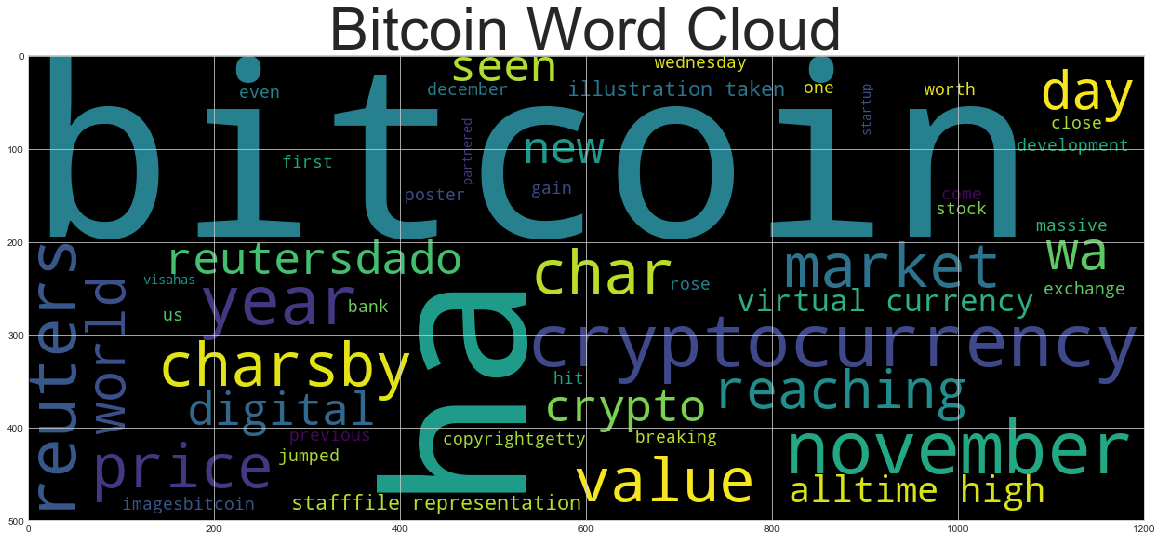

In [169]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=500, max_words=50).generate(' '.join(processed_bitcoin))
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize = 60)

Text(0.5, 1.0, 'Ethereum Word Cloud')

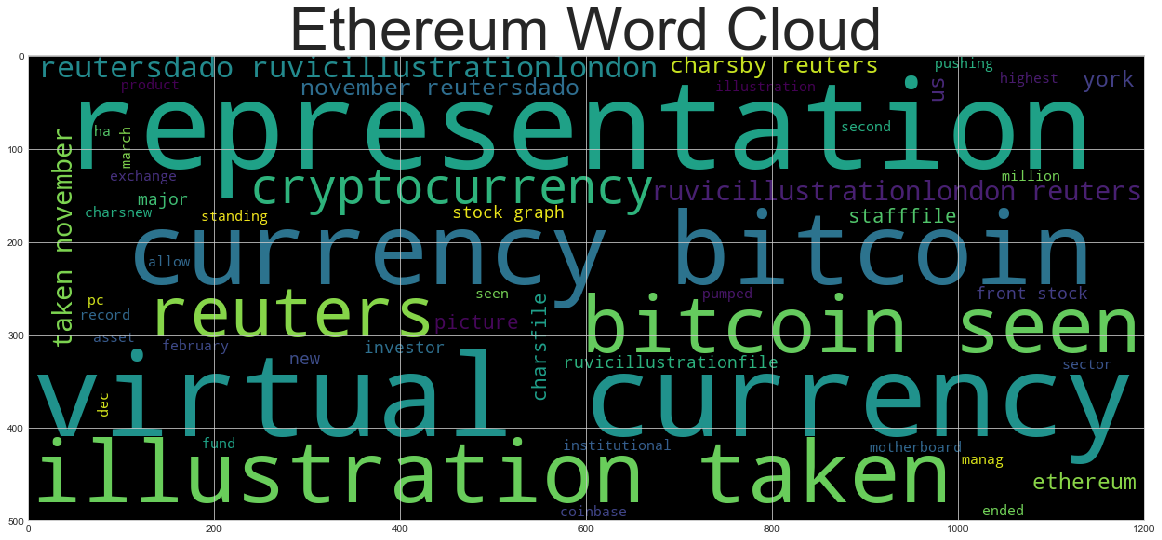

In [171]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=500, max_words=50).generate(' '.join(processed_ethereum))
plt.imshow(wc)
plt.title('Ethereum Word Cloud', fontsize = 60)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [108]:
import spacy
from spacy import displacy

In [109]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [110]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [121]:
# Concatenate all of the bitcoin text together
corpus_bitcoin = list(bitcoin_sentiment_df['text'])
big_string_bitcoin = ' '.join(corpus_bitcoin)
big_string_bitcoin

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 2

In [175]:
# Run the NER processor on all of the text
tokens_bitcoin = nlp(big_string_bitcoin)

# Add a title to the document
tokens_bitcoin.user_data['title'] = 'Bitcoin NER'

In [176]:
# Render the visualization
displacy.render(tokens_bitcoin, style="ent")

In [125]:
# List all Entities
for ent in tokens_bitcoin.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednes

---

## Ethereum NER

In [122]:
# Concatenate all of the ethereum text together
corpus_ethereum = list(ethereum_sentiment_df['text'])
big_string_ethereum = ' '.join(corpus_ethereum)
big_string_ethereum

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 

In [177]:
# Run the NER processor on all of the text
tokens_ethereum = nlp(big_string_ethereum)

# Add a title to the document
tokens_ethereum.user_data['title'] = 'Ethereum NER'

In [178]:
# Render the visualization
displacy.render(tokens_ethereum, style="ent")

In [128]:
# List all Entities
for ent in tokens_ethereum.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
N